In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [45]:
def clean_text(text):
    stopwords = set(STOPWORDS)
    # Agrega cualquier otra palabra que desees excluir
    stopwords.update(['the', 'and', 'to', 'of', 'in', 'for', 'on', 'is', 'with','introduction','de','y','la','en','beginner','course','learn','introducción','-','&','beginners'])
    cleaned_text = ' '.join(word for word in text.lower().split() if word not in stopwords)
    return cleaned_text

In [46]:
# Cargar los datasets
df1 =pd.read_csv(r'DATASETS\_ETL_COUSERA.csv',encoding='utf-8')
df2=pd.read_csv(r'DATASETS\_ETL_EDX.csv',encoding='utf-8')
df3=pd.read_csv(r'DATASETS\_UDEMY_EDX.csv',sep=',', encoding='utf-8')

df_coursera=pd.DataFrame(columns=['title'])
df_edx=pd.DataFrame(columns=['title'])
df_udemy=pd.DataFrame(columns=['title'])

In [47]:
df_coursera['title']=df1['name'].apply(clean_text)
df_edx['title']=df2['title'].apply(clean_text)
df_udemy['title']=df3['course_title'].apply(clean_text)

In [48]:
# Concatenar los títulos de los cursos de los tres datasets en un solo texto
combined_text = ' '.join(df_coursera['title']) + ' ' + ' '.join(df_edx['title']) + ' ' + ' '.join(df_udemy['title'])

In [49]:
# Crear el objeto WordCloud para Coursera
wordcloud_coursera = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_coursera['title']))

In [50]:
# Crear el objeto WordCloud para EDX
wordcloud_edx = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_edx['title']))


In [51]:
# Crear el objeto WordCloud para Udemy
wordcloud_udemy = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_udemy['title']))

In [52]:
# Crear el objeto WordCloud para los tres datasets combinados
wordcloud_combined = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

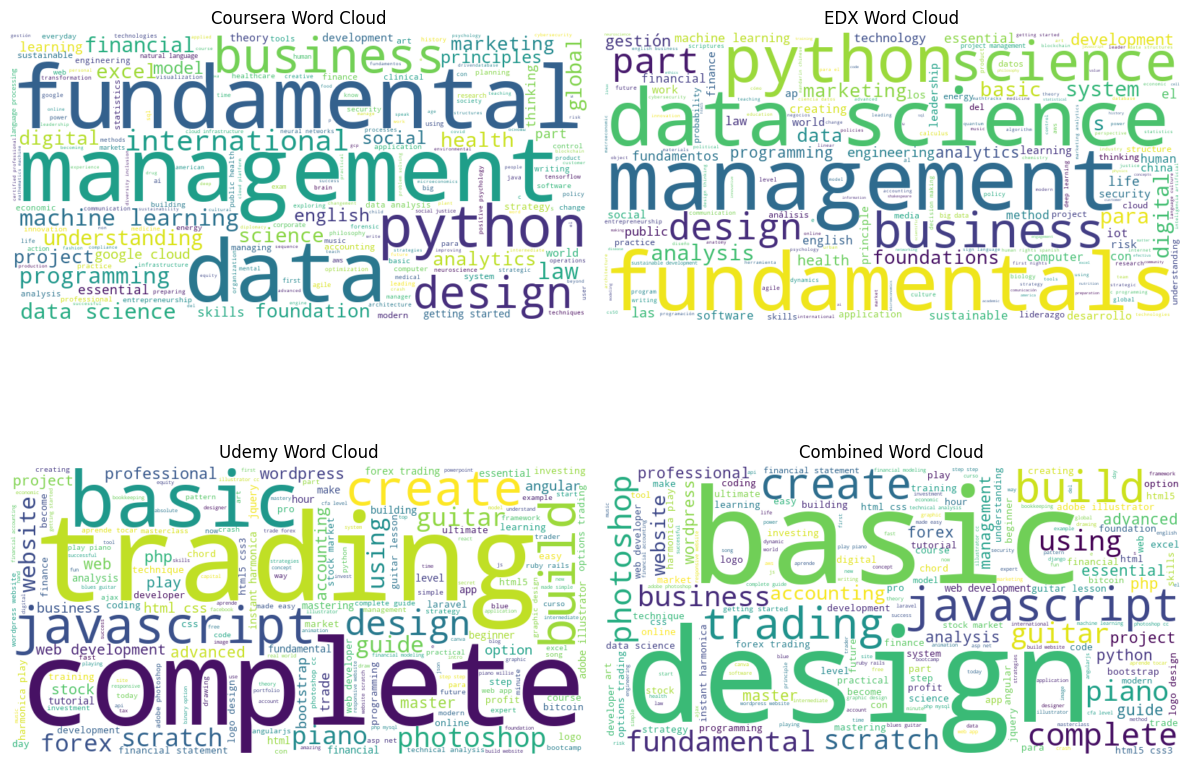

In [53]:
# Mostrar los Word Clouds
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].imshow(wordcloud_coursera, interpolation='bilinear')
axs[0, 0].set_title('Coursera Word Cloud')
axs[0, 0].axis('off')

axs[0, 1].imshow(wordcloud_edx, interpolation='bilinear')
axs[0, 1].set_title('EDX Word Cloud')
axs[0, 1].axis('off')

axs[1, 0].imshow(wordcloud_udemy, interpolation='bilinear')
axs[1, 0].set_title('Udemy Word Cloud')
axs[1, 0].axis('off')

axs[1, 1].imshow(wordcloud_combined, interpolation='bilinear')
axs[1, 1].set_title('Combined Word Cloud')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [54]:
# Contar la frecuencia de las palabras
word_freq = Counter(combined_text.split())

# Crear el DataFrame de la tabla de frecuencia
word_freq_table = pd.DataFrame(list(word_freq.items()), columns=['Palabra', 'Frecuencia'])

# Ordenar la tabla por frecuencia de mayor a menor
word_freq_table = word_freq_table.sort_values('Frecuencia', ascending=False)

In [55]:

# Mostrar la tabla de frecuencia
word_freq_table.head(20)

,Palabra,Frecuencia
2105,trading,286
61,web,229
119,design,224
831,guitar,204
2677,complete,186
4915,piano,176
329,build,173
15,financial,166
2266,create,162
3105,play,159
